In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/PythonAIClass5/BigMartSales Prediction

MessageError: ignored

In [ ]:
import os
print(os.listdir())
# sử dụng thư viện pandas
import pandas as pd
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

print(train.shape, test.shape)
print(train.index)
print(train.columns)
print(test.columns)

['Test.csv', 'Train.csv']
(8523, 12) (5681, 11)
RangeIndex(start=0, stop=8523, step=1)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [ ]:
import numpy as np

display(train.head(5))
print(np.unique(train["Item_Fat_Content"]))
print(np.unique(train["Item_Type"]))
print(train["Outlet_Size"].unique())
print(np.unique(train["Outlet_Location_Type"]))
print(np.unique(train["Outlet_Type"]))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 2' 'Tier 3']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


In [ ]:
#ITEM INFO
#item_identifier: ID item
#Item_Weight: trọng lượng sản phẩm
#Item_Fat_Content: hàm lượng mỡ của sản phẩm
#Item_Visibility: Khả năng nhìn thấy sản phẩm trên kệ
#Item_Type: loại sản phẩm
#Item MRP: giá bán lẻ sản phẩm
#====================
#OUTLET INFO: thông tin nơi bán sản phẩm
# ID
#Outlet_Establishment_Year: năm xây dựng ra Outlet
#Size: kích thước nơi bán sản phẩm
#Outlet_location_type: Nơi bán sản phẩm (dữ liệu che giấu)
#Outlet_Type: chợ hoặc tiệm tạp hóa
#Item_Outlet_Sales: số sản phẩm bán được
#===============================
#bài toán: dự bán số sản phẩm bán được
s = train["Item_Fat_Content"].value_counts()
print(s,type(s))
print(s.index, type(s.index))
print(s.values,type(s.values))
StatsDF = pd.DataFrame({'Item_Fat_Content':s.index, 'Frequency':s.values})
display(StatsDF)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 <class 'pandas.core.series.Series'>
Index(['Low Fat', 'Regular', 'LF', 'reg', 'low fat'], dtype='object') <class 'pandas.core.indexes.base.Index'>
[5089 2889  316  117  112] <class 'numpy.ndarray'>


,Item_Fat_Content,Frequency
0,Low Fat,5089
1,Regular,2889
2,LF,316
3,reg,117
4,low fat,112


In [ ]:
train.describe(include=[np.number])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.describe(include= np.object) #describe only String value

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#filling null values with mean/mode/median
#for train set
print(train.Item_Weight.mean())
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
print(train.Outlet_Size.mode(),type(train.Outlet_Size.mode()))
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])
#for test set
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])#test.Outlet_Size.mode() is series type

12.857645184136409
0    Medium
dtype: object <class 'pandas.core.series.Series'>


In [ ]:
print(train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
print(test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [ ]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('low fat', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')

test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF', 'Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg', 'Regular')


In [ ]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

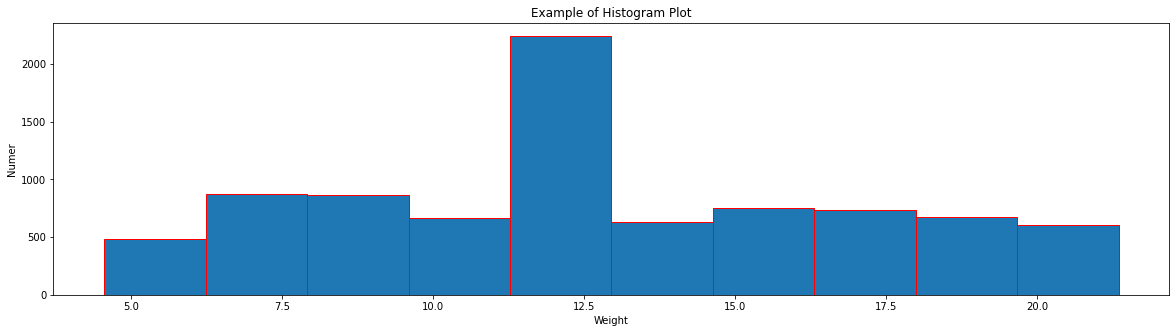

In [ ]:
import matplotlib.pyplot as plt
# Plot the distribution of numpy data
train.Item_Weight.plot(kind='hist', edgecolor='red', figsize=(20,5))
 
# Add axis labels
plt.xlabel("Weight")
plt.ylabel("Numer")
plt.title("Example of Histogram Plot")
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


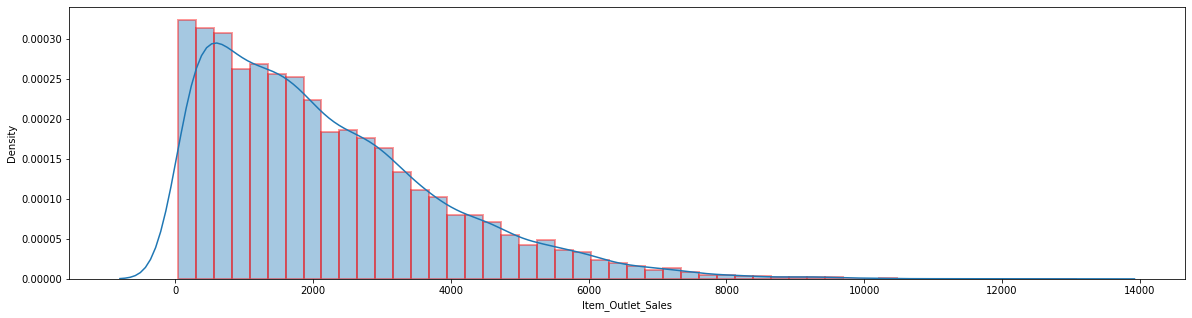

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.distplot(train["Item_Outlet_Sales"], hist_kws=dict(edgecolor="red", linewidth=2))

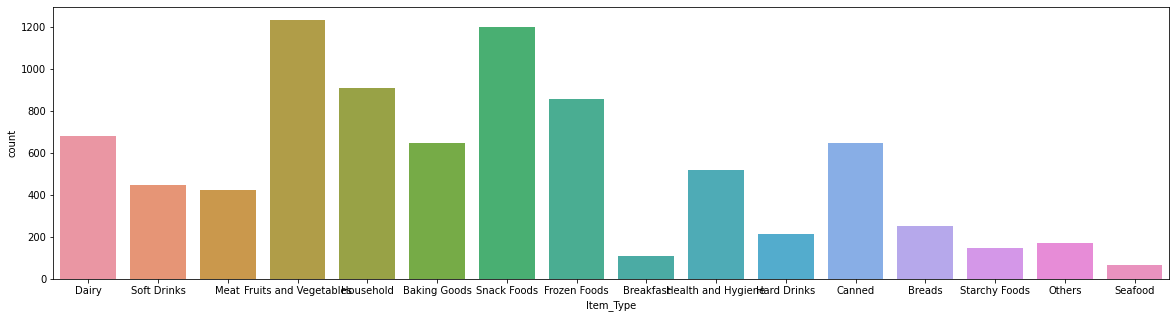

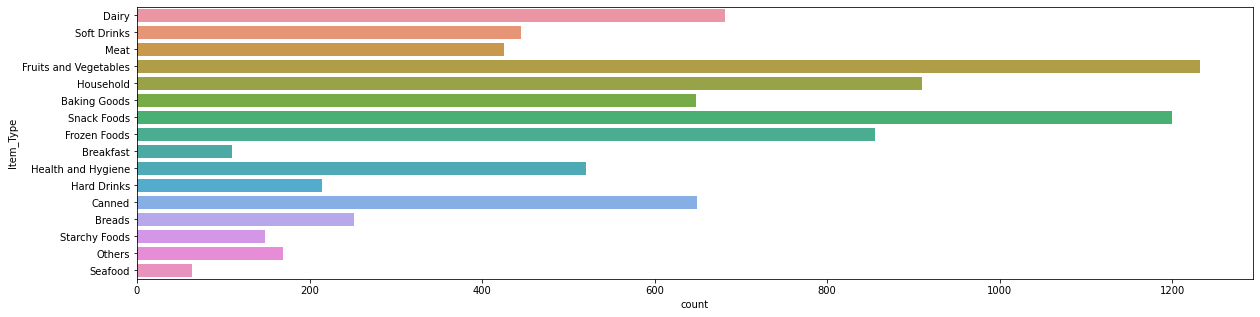

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x='Item_Type',data=train)

plt.figure(figsize=(20,5))
sns.countplot(y='Item_Type',data=train)

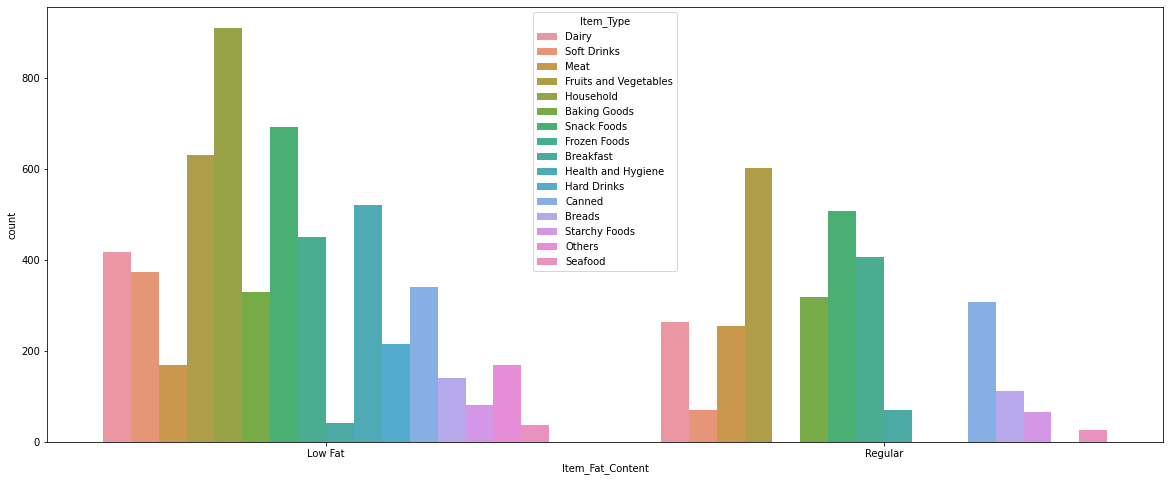

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,8))

sns.countplot(x="Item_Fat_Content",hue="Item_Type",data=train)

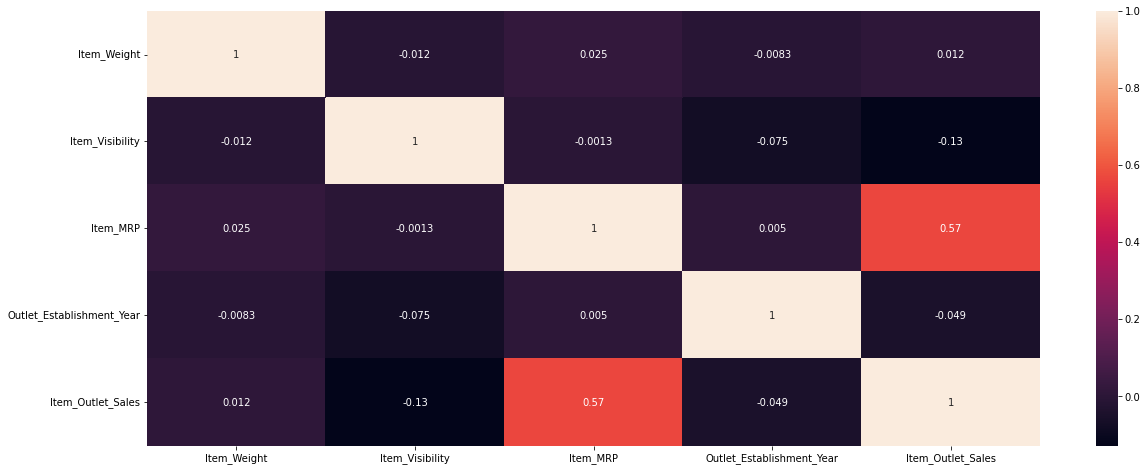

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(),annot=True)

In [ ]:
x_train = train[["Item_Weight", "Item_Visibility", "Item_MRP"]]
x_test = test[["Item_Weight", "Item_Visibility", "Item_MRP"]]
y_train = train["Item_Outlet_Sales"]

In [ ]:
display(x_train.head())
print(type(x_train))

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


<class 'pandas.core.frame.DataFrame'>


In [ ]:
display(y_train.head())
print(type(y_train))

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_pred = neigh.predict(x_test)
display(y_pred)
print(test.columns)
test['Predict']=y_pred
PredictDF = test.copy()
display(test)
#PredictDF["Item_Outlet_Sales_Predict"] = y_pred

array([2042.80756, 1202.56796, 3529.20606, ..., 1439.7925 , 2254.33222,
       1084.05556])

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predict
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,2042.80756
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1202.56796
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,3529.20606
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2069.63930
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5141.97340
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1324.80884
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3116.87612
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1439.79250
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,2254.33222


In [ ]:
display(PredictDF.head(20))


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_Predict
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4311.32132
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,839.50722
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1906.38514
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2609.33678
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,887.37824
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,663.73602
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,868.93558
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1623.28698
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,1762.97182
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,2603.14484
